<a href="https://colab.research.google.com/github/tamer017/Low-power-Edge-based-Player-activity-Tracking/blob/main/Low_power_Edge_based_Player_activity_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense , Dropout , BatchNormalization , Conv2D , MaxPool2D , Conv1D , MaxPooling1D
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler,OneHotEncoder
import scipy.stats as stats
import tensorflow.keras.layers as tkl
from tensorflow.keras import initializers
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataP=pd.read_csv("/content/drive/MyDrive/salah/dataset/passing.csv")
dataR=pd.read_csv("/content/drive/MyDrive/salah/dataset/running.csv")
dataS=pd.read_csv("/content/drive/MyDrive/salah/dataset/standing.csv")
dataW=pd.read_csv("/content/drive/MyDrive/salah/dataset/walking.csv")
dataJ=pd.read_csv("/content/drive/MyDrive/salah/dataset/jumping.csv")

In [ ]:
print('There are '+str(dataR.shape[0])+' running points each one of them contains '+str(dataR.shape[1]-1)+' features and labels '+str(dataR.iloc[1,-1])+' as an output label refers to the running.')
print('There are '+str(dataW.shape[0])+' walking points each one of them contains '+str(dataW.shape[1]-1)+' features and labels '+str(dataW.iloc[1,-1])+' as an output label refers to the walking.')
print('There are '+str(dataS.shape[0])+' standing points each one of them contains '+str(dataS.shape[1]-1)+' features and labels '+str(dataS.iloc[1,-1])+' as an output label refers to the standing.')
print('There are '+str(dataJ.shape[0])+' jumping points each one of them contains '+str(dataJ.shape[1]-1)+' features and labels '+str(dataJ.iloc[1,-1])+' as an output label refers to the jumping.')
print('There are '+str(dataP.shape[0])+' passing points each one of them contains '+str(dataP.shape[1]-1)+' features and labels '+str(dataP.iloc[1,-1])+' as an output label refers to the passing.')

There are 98916 running points each one of them contains 8 features and labels 0 as an output label refers to the running.
There are 85616 walking points each one of them contains 8 features and labels 1 as an output label refers to the walking.
There are 82777 standing points each one of them contains 8 features and labels 2 as an output label refers to the standing.
There are 68505 jumping points each one of them contains 8 features and labels 3 as an output label refers to the jumping.
There are 74603 passing points each one of them contains 8 features and labels 4 as an output label refers to the passing.


,Unnamed: 0,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,time,label
0,0,-0.39,-0.66,0.54,8.67,-8.61,11.60,13.0,0
1,1,-0.40,-0.67,0.55,8.73,-6.04,10.56,24.0,0
2,2,-0.39,-0.66,0.55,7.26,-5.98,9.09,36.0,0
3,3,-0.39,-0.67,0.54,6.53,-5.98,8.12,47.0,0
4,4,-0.40,-0.67,0.55,7.14,-4.27,7.87,58.0,0
...,...,...,...,...,...,...,...,...,...
98911,98911,1.01,0.57,-0.17,-98.21,100.46,-62.38,91302.0,0
98912,98912,2.45,1.71,0.54,-154.79,273.62,-98.39,91322.0,0
98913,98913,2.86,1.34,-0.88,-22.52,-363.77,113.46,91343.0,0
98914,98914,0.43,1.90,0.02,17.33,131.23,-30.52,91365.0,0


In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 6

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        acc_x = df['acc_x'].values[i: i + frame_size]
        acc_y = df['acc_y'].values[i: i + frame_size]
        acc_z = df['acc_z'].values[i: i + frame_size]
        gyr_x = df['gyr_x'].values[i: i + frame_size]
        gyr_y = df['gyr_y'].values[i: i + frame_size]
        gyr_z = df['gyr_z'].values[i: i + frame_size]

        
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([acc_x, acc_y, acc_z,gyr_x,gyr_y,gyr_z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames)
    # .reshape(-1, frame_size, N_FEATURES)
    labels = np.array(labels)

    return frames, labels

In [ ]:
RF,RY  = get_frames(dataR,300,30)
WF,WY  = get_frames(dataW,300,25)
SF,SY  = get_frames(dataS,300,25)
JF,JY = get_frames(dataJ,300,100)
PF,PY = get_frames(dataP,300,100)
RY.shape

(3288,)

In [ ]:
data=np.concatenate([RF.reshape(RF.shape[0],RF.shape[2]*RF.shape[1]),
                     WF.reshape(WF.shape[0],WF.shape[2]*WF.shape[1]),
                     SF.reshape(SF.shape[0],SF.shape[2]*SF.shape[1]),
                     JF.reshape(JF.shape[0],JF.shape[2]*JF.shape[1]),
                     PF.reshape(PF.shape[0],PF.shape[2]*PF.shape[1])],axis=0)
output_labels=np.concatenate([RY,WY,SY,JY,PY],axis=0)
output_labels.shape

(11428,)

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)

In [ ]:
unique, counts = np.unique(output_labels, return_counts=True)
counts,unique

(array([3288, 3413, 3300,  683,  744]), array([0, 1, 2, 3, 4]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, output_labels, test_size = 0.25, random_state = 0, stratify = output_labels)


In [ ]:
X_train.shape, X_test.shape


((8571, 1800), (2857, 1800))

In [ ]:
input=Input(shape=(1800))
layer=layers.Reshape((1800,1))(input)
layer=Conv1D(filters=32, kernel_size=3, activation='relu')(layer)
layer=Conv1D(filters=32, kernel_size=3, activation='relu')(layer)
layer=Conv1D(filters=64, kernel_size=3, activation='relu')(layer)
layer=Dropout(0.5)(layer)
layer=MaxPooling1D(pool_size=2)(layer)
layer=Flatten()(layer)
layer=Dense(16, activation='relu')(layer)
output=Dense(5, activation='softmax')(layer)
model=keras.Model(inputs=input,outputs=output)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1800)]            0         
                                                                 
 reshape_5 (Reshape)         (None, 1800, 1)           0         
                                                                 
 conv1d_14 (Conv1D)          (None, 1798, 32)          128       
                                                                 
 conv1d_15 (Conv1D)          (None, 1796, 32)          3104      
                                                                 
 conv1d_16 (Conv1D)          (None, 1794, 64)          6208      
                                                                 
 dropout_2 (Dropout)         (None, 1794, 64)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 897, 64)          0   

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs = 15, validation_data= (X_test, y_test), verbose=1)


Epoch 1/15
268/268 [==============================] - 66s 240ms/step - loss: 0.2171 - accuracy: 0.9258 - val_loss: 0.0513 - val_accuracy: 0.9898
Epoch 2/15
268/268 [==============================] - 58s 216ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0495 - val_accuracy: 0.9877
Epoch 3/15
268/268 [==============================] - 57s 212ms/step - loss: 0.0110 - accuracy: 0.9959 - val_loss: 0.0207 - val_accuracy: 0.9944
Epoch 4/15
268/268 [==============================] - 57s 212ms/step - loss: 0.0069 - accuracy: 0.9973 - val_loss: 0.0177 - val_accuracy: 0.9940
Epoch 5/15
268/268 [==============================] - 57s 213ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0371 - val_accuracy: 0.9888
Epoch 6/15
268/268 [==============================] - 57s 211ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0132 - val_accuracy: 0.9947
Epoch 7/15
268/268 [==============================] - 57s 212ms/step - loss: 1.6529e-04 - accuracy: 1.0000 - val_loss: 0.0139 - va

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

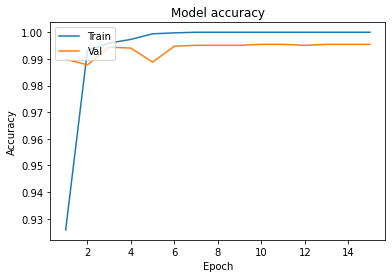

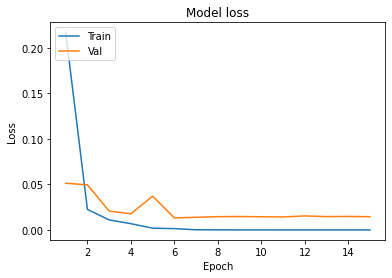

In [ ]:
plot_learningCurve(history, 15)


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

In [ ]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [ ]:
label = LabelEncoder()
# x['label'] = label.fit_transform(x['activity'])
# data.head()
label

LabelEncoder()

In [ ]:
label.classes = ['running','walking','standing','jumping','ballPassing']
label.classes

['running', 'walking', 'standing', 'jumping', 'ballPassing']

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fda16aeb950>)

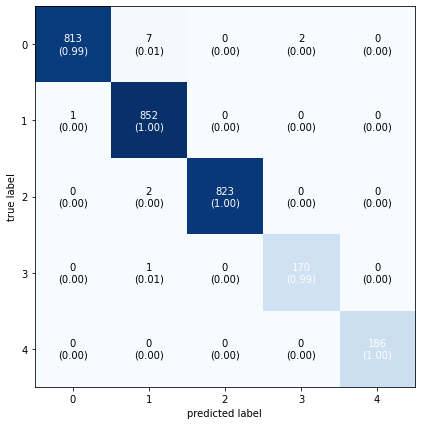

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test_class,y_pred_class)
plot_confusion_matrix(conf_mat= cm,show_normed=True,figsize=(7,7))

In [ ]:
model.save('CNN1D_FinalModel4' + '.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
open('CNN1D_FinalModel4' + '.tflite' , 'wb').write(tflite_model)

87248

In [ ]:
def hex_to_c_array(hex_data , var_name):
    c_str = ''
    
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'
    
    c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'
    
    
    c_str += 'const unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i , val in enumerate(hex_data) :
        
        hex_str = format(val,'#04x')
        
        if(i+1) < len(hex_data) : 
            hex_str += ','
        if(i+1) % 12 == 0 : 
            hex_str += '\n'
        hex_array.append(hex_str) 
        
    c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'
        
    c_str += '#endif  //' + var_name.upper() + '_H' 
        
    return c_str

In [ ]:
with open('c_CNN1D_FinalModel4' + '.h' , 'w') as file : 
    file.write(hex_to_c_array(tflite_model,'c_CNN1D_FinalModel4'))